<a href="https://colab.research.google.com/github/gnmuller/Thinkful/blob/main/Thinkful_Choc_bar_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chocolate Bar Review Analysis Introduction





##What makes a good chocolate bar? 
This is an analysis of seventeen-hundred and thirty-eight expert reviews of chocolate bars. The data ingested from Kaggle. ([Link](https://colab.research.google.com/drive/1XGKP6OCJdu2UjRuRJJGLoSS-QgSRMzDo#scrollTo=3l653NXV75zr&line=2&uniqifier=1)) Where each bar of cacao rated on a scale of 1 to 5 and was plain dark chocolate. (5: Elite, 4:Premium, 3:Satisfactory, 2:Disappointing, 1: Unpleasant) 
##How does the bar get made?
The purpose of this analysis is to find what makes a bar get a higher score. This Jupyter notebook will follow the same process as a cocoa bean. Starting with the beans themselves. We will then move to the regions in which they were grown. How much cocoa used in the bean, and finally where the bar manufactured is where we will end. At each point along the way searching for clear statistical proof.







# Notebook Set-up

---



Importing libraries needed to conduct analysis of data.



In [3]:
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

sns.set()

 

 
Creating a connection to Google Drive account with stored Kaggle file.  
 



In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
choc_review_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/flavors_of_cacao.csv')

Checking for the successful import of data.

In [6]:
choc_review_df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Renaming complicated column names to elementary values

In [7]:
choc_review_df.columns = ['company', 'bean_origin',
       'review_n', 'review_year', 'cocoa_perc', 'company_location', 'rating',
       'bean_type', 'bean_origin_c']
choc_review_df.head()

,company,bean_origin,review_n,review_year,cocoa_perc,company_location,rating,bean_type,bean_origin_c
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Converting the amount of cocoa in each bar to a number for calculations later on in the notebook.

In [8]:
choc_review_df["cocoa_perc"]= choc_review_df["cocoa_perc"].str.replace('%', '').astype(float)/100
choc_review_df.head()

,company,bean_origin,review_n,review_year,cocoa_perc,company_location,rating,bean_type,bean_origin_c
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


# Bean Types



## Exploring the dataset for the cocoa beans planted that will one day end up in the chocolate bar

In [9]:
print("Every bar in the data set uses one of the " + str(choc_review_df['bean_type'].nunique()) + " different types of cocoa beans.")

Every bar in the data set uses one of the 41 different types of cocoa beans.


### Discovering the most popular bean's used in the dataset

In [10]:
print("The top five most used cocoa beans are: \n" + str(choc_review_df['bean_type'].value_counts().head(5)))

The top five most used cocoa beans are: 
                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: bean_type, dtype: int64


## Filtering datasets using only the most popular bean. Which is the *Trinitario*, to discover any effect on the rating score. 


In [11]:
trinitario_df = choc_review_df.loc[choc_review_df["bean_type"]== "Trinitario"]
n_trinitario_df = choc_review_df.loc[choc_review_df["bean_type"] != "Trinitario"]

In [12]:
#Finding blank values
n_trinitario_df["bean_type"][0]

'\xa0'

In [35]:
n_trinitario_df = choc_review_df.loc[choc_review_df["bean_type"] != " "]

In [39]:
trinitario_df.info()
n_trinitario_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 17 to 1776
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           419 non-null    object 
 1   bean_origin       419 non-null    object 
 2   review_n          419 non-null    int64  
 3   review_year       419 non-null    int64  
 4   cocoa_perc        419 non-null    float64
 5   company_location  419 non-null    object 
 6   rating            419 non-null    float64
 7   bean_type         419 non-null    object 
 8   bean_origin_c     418 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 32.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 5 to 1792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           908 non-null    object 
 1   bean_origin       908 non-null    object 
 2   review_n        

In [37]:
stats.ttest_ind(trinitario_df["rating"], n_trinitario_df["rating"])

Ttest_indResult(statistic=0.47039522723351795, pvalue=0.6381500913496303)

 The analysis shows a **insignificant difference** in the bars.

Text(0.5, 1.0, 'Other Cocoa Beans')

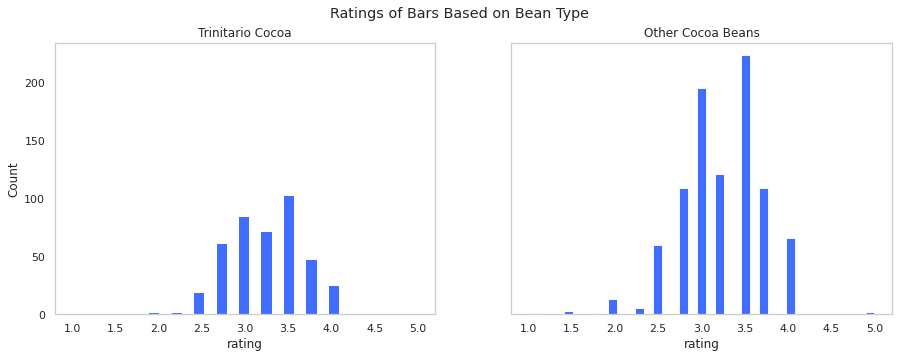

In [38]:
palette = sns.color_palette("bright")
sns.set_palette(palette)
fig, axes = plt.subplots(1,2, figsize = (15,5), sharey= True, sharex= True)
fig.suptitle('Ratings of Bars Based on Bean Type')
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))
sns.set_style("whitegrid", {'axes.grid' : False})


sns.histplot(ax=axes[0], x= trinitario_df["rating"]).set_title("Trinitario Cocoa")
sns.histplot(ax=axes[1], x= n_trinitario_df["rating"]).set_title("Other Cocoa Beans")

#lowest score is a 4.0

## The Trinitario bean reaches the same high as the other beans at 4.0, but does not fall below 2.5.

# Regions

Cocoa beans plant anywhere, but are a tropical plant. For instance the *Trinitario* bean plants in thirty-five different countries in our dataset! Dominated by the North and South American Countries, including the Caribbean. 

Below we explore these regions. The one-hundred countries listed in our data split into three separate regions. (Africa, Asia and the Pacific Islands, America and the Caribbean islands)

In [16]:
u_countries = choc_review_df["bean_origin_c"].unique()
print(u_countries)

['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba' 'Panama' 'Madagascar'
 'Brazil' 'Ecuador' 'Colombia' 'Burma' 'Papua New Guinea' 'Bolivia' 'Fiji'
 'Mexico' 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Tanzania'
 'Dominican Republic' 'Ghana' 'Belize' '\xa0' 'Jamaica' 'Grenada'
 'Guatemala' 'Honduras' 'Costa Rica' 'Domincan Republic' 'Haiti' 'Congo'
 'Philippines' 'Malaysia' 'Dominican Rep., Bali'
 'Venez,Africa,Brasil,Peru,Mex' 'Gabon' 'Ivory Coast' 'Carribean'
 'Sri Lanka' 'Puerto Rico' 'Uganda' 'Martinique' 'Sao Tome & Principe'
 'Vanuatu' 'Australia' 'Liberia' 'Ecuador, Costa Rica' 'West Africa'
 'Hawaii' 'St. Lucia' 'Cost Rica, Ven' 'Peru, Madagascar'
 'Venezuela, Trinidad' 'Trinidad, Tobago' 'Ven, Trinidad, Ecuador'
 'South America, Africa' 'India' 'Africa, Carribean, C. Am.' 'Tobago'
 'Ven., Indonesia, Ecuad.' 'Trinidad-Tobago' 'Peru, Ecuador, Venezuela'
 'Venezuela, Dom. Rep.' 'Colombia, Ecuador' 'Solomon Islands' 'Nigeria'
 'Peru, Belize' 'Peru, Mad., Dom. Rep.' nan 'PNG, Vanuatu, 

In [17]:
african_countries = ['Sao Tome', 'Togo','Madagascar','Tanzania','Ghana','Gabon','Ivory Coast','Uganda','Sao Tome & Principe','Liberia','West Africa',
                     'Africa, Carribean, C. Am.','Nigeria','Ghana, Domin. Rep','Cameroon','Principe','Ghana & Madagascar', 'Madagascar & Ecuador',
                     'Mad., Java, PNG','Ghana, Panama, Ecuador','Venezuela, Carribean']
american_countries = ['Peru','Venezuela','Cuba','Panama','Brazil','Ecuador','Colombia','Bolivia','Mexico','Nicaragua','Dominican Republic','Belize',
                      'Jamaica','Grenada','Dominican Rep., Bali','Carribean','Puerto Rico','Martinique','Hawaii','St. Lucia','Venezuela, Trinidad',
                      'Trinidad, Tobago','Ven, Trinidad, Ecuador','Tobago','Trinidad-Tobago','Peru, Ecuador, Venezuela','Venezuela, Dom. Rep.',
                      'Colombia, Ecuador','Solomon Islands','Peru, Belize','Peru, Mad., Dom. Rep.','El Salvador','South America','Trinidad, Ecuador',
                      'Venezuela, Java','Peru(SMartin,Pangoa,nacional)','Central and S. America','Ven., Trinidad, Mad.', 'Carribean(DR/Jam/Tri)',
                      'Ven.,Ecu.,Peru,Nic.','Guat., D.R., Peru, Mad., PNG','Peru, Dom. Rep','Ven, Bolivia, D.R.','DR, Ecuador, Peru','Suriname',
                      'Peru, Ecuador','Ecuador, Mad., PNG',]
asian_countries = ['Papua New Guinea','Burma','Fiji', 'Indonesia','Trinidad','Vietnam','Philippines','Malaysia','Sri Lanka','Vanuatu','Australia',
                   'India','Ven., Indonesia, Ecuad.','Samoa',]

In [18]:
african_beans_df = choc_review_df[choc_review_df["bean_origin_c"].isin(african_countries)]
american_beans_df = choc_review_df[choc_review_df["bean_origin_c"].isin(american_countries)]
asian_beans_df = choc_review_df[choc_review_df["bean_origin_c"].isin(asian_countries)]

Exclusion's occur in this process. Countries with no clear distinction. Such as 'Venezuela/ Ghana', 'Indonesia, Ghana' and 'Dom. Rep., Madagascar'. The African dataset includes two-hundred and sixty six records. The Asian countries represents one-hundred and sixty five. With the American countries including one-thousand fifty four data points. With all above we will now look for statistical significance using the t-test. 

In [19]:
#is african beans going to score higher then american?
stats.ttest_ind(african_beans_df["rating"], american_beans_df["rating"])

Ttest_indResult(statistic=-0.36201977480526226, pvalue=0.7173911942267222)

In [20]:
#is african beans going to be different then asian?
stats.ttest_ind(african_beans_df["rating"], asian_beans_df["rating"])

Ttest_indResult(statistic=-1.3896040156167744, pvalue=0.16536988341500417)

In [21]:
#For good measure let's look at asian and american
stats.ttest_ind(asian_beans_df["rating"], american_beans_df["rating"])

Ttest_indResult(statistic=1.3108708150780886, pvalue=0.19012993901220673)

There is no significant difference in rating between the two regions. Beans coming from the African region and the American region. There is also none between African and Asian region. From this we can also conclude Asian and American Beans have no difference as well.

Text(0.5, 1.0, 'Asian')

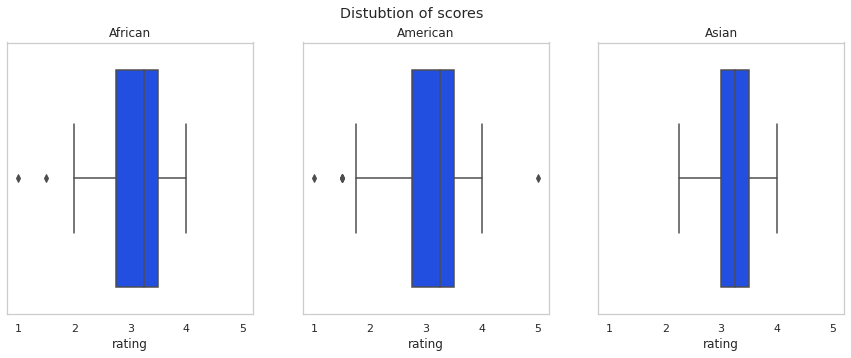

In [42]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharex= True)
fig.suptitle('Distubtion of scores')

#African
sns.boxplot(ax= axes[0],x= african_beans_df["rating"]).set_title("African")
#American
sns.boxplot(ax=axes[1], x= american_beans_df["rating"]).set_title("American")
#Asian
sns.boxplot(ax=axes[2], x= asian_beans_df["rating"]).set_title("Asian")


African, American, and Asian regions all score a little above the 3.0 range. Concluding it is not a matter of region when it comes to the ratings of chocolate bars, even if outliers happen. 

# Cocoa Percent And Ratings

Cocoa beans come out of the ground processed in their respective regions. It is now on the chocolaterie to make the chocolate bar. Bars of chocolate are on a scale of zero to one-hundred percent. A bar with one-hundred percent has no sweetener in it. *So watch out if eating.*  Below we look at whether cocoa percentage has an affect on rating.

In [23]:
stats.pearsonr(choc_review_df["cocoa_perc"], choc_review_df["rating"])

(-0.16482017762424425, 2.1215999288704344e-12)

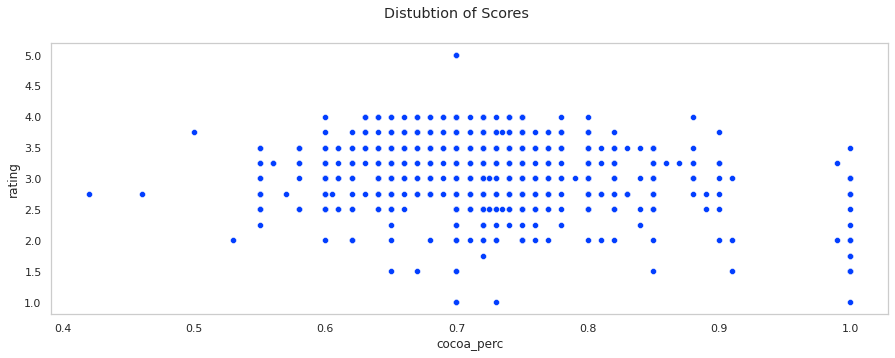

In [24]:
fig, axes = plt.subplots( figsize = (15,5), sharex= True)
fig.suptitle('Distubtion of Scores')
sns.scatterplot(x=choc_review_df["cocoa_perc"], y= choc_review_df["rating"])

There is no strong sign cocoa percentage affects the rating a bar receives. ***However*** it's natural to wonder about that data point that says 5.0. *A perfect score* A company called [Amedei](https://us.amedei.it/en/)  makes both of those values. The reviewers tasted 70% dark chocolate. But I understand temptations towards flavored or less rich chocolate. Oh! The bean used in the two perfect 5.0 scores? Trinitario. The other being a blend.

In [25]:
choc_review_df.loc[choc_review_df["rating"] == 5].head()

,company,bean_origin,review_n,review_year,cocoa_perc,company_location,rating,bean_type,bean_origin_c
78,Amedei,Chuao,111,2007,0.7,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.7,Italy,5.0,Blend,


In [26]:
data_tips = px.data.tips()

px.histogram(choc_review_df, x = "cocoa_perc", title= "Cocoa Percentage Usage")


### Most of the chocolate bars are using a percentage of seventy percent cocoa. With only twenty using one-hundred percent. Below we look to answer of this is a significant difference in the ratings of bars.

In [27]:
seven_perc_c_df = choc_review_df.loc[choc_review_df["cocoa_perc"] == .7]
print( seven_perc_c_df.info())
n_seven_perc_c_df = choc_review_df.loc[choc_review_df["cocoa_perc"] != .7]
print(n_seven_perc_c_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 1 to 1790
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           672 non-null    object 
 1   bean_origin       672 non-null    object 
 2   review_n          672 non-null    int64  
 3   review_year       672 non-null    int64  
 4   cocoa_perc        672 non-null    float64
 5   company_location  672 non-null    object 
 6   rating            672 non-null    float64
 7   bean_type         671 non-null    object 
 8   bean_origin_c     672 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 52.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1123 non-null   object 
 1   bean_origin       1123 non-null   object 
 2   review_n   

In [28]:
stats.ttest_ind(seven_perc_c_df["rating"], n_seven_perc_c_df["rating"])


Ttest_indResult(statistic=6.242463608649137, pvalue=5.363747175208513e-10)

Comparing the bars of chocolate **there is a significant difference** between the ratings!

In [40]:
print( "The mean rating of a seventy percent bar is " + str(round(seven_perc_c_df["rating"].sum()/len(seven_perc_c_df["rating"]),2)))
print( "The mean rating of a not seveenty perent bar is " + str(round(n_seven_perc_c_df["rating"].sum()/len(n_seven_perc_c_df["rating"]),2)))

The mean rating of a seventy percent bar is 3.28
The mean rating of a not seveenty perent bar is 3.13


Text(0.5, 1.0, 'All Other')

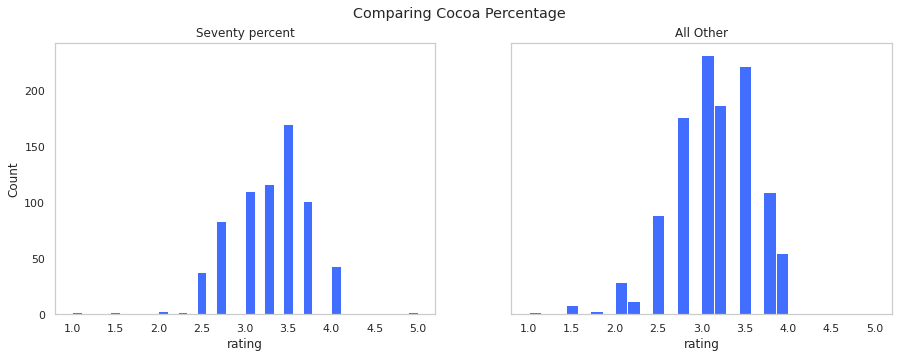

In [29]:
fig, axes = plt.subplots(1,2, figsize = (15,5), sharey= True, sharex= True)
fig.suptitle('Comparing Cocoa Percentage')
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))


sns.histplot(ax=axes[0], x= seven_perc_c_df["rating"]).set_title("Seventy percent")
sns.histplot(ax=axes[1], x= n_seven_perc_c_df["rating"]).set_title("All Other")

### Seventy percent Cocoa percentage does not fall below 2.5. While it still reaching the same high scores of 4.0 including the rare 5.0 score. 

# United States Bias#

Finally we look to see if there may be a bias in the companies that are producing the chocolate bars. There are sixty different countries in the data set. But the majority locate in the United States. 

In [30]:
data_tips = px.data.tips()

px.histogram(data_tips, x = choc_review_df["company_location"], title= "Country Location of Companies")

Splitting the dataset into two groups to compare ratings. Companies located in the United States, and those that are not. 

In [31]:
usa_company_df = choc_review_df.loc[choc_review_df["company_location"]== "U.S.A."]
n_usa_company_df = choc_review_df.loc[choc_review_df["company_location"] != "U.S.A."]

In [32]:
usa_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 23 to 1766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           764 non-null    object 
 1   bean_origin       764 non-null    object 
 2   review_n          764 non-null    int64  
 3   review_year       764 non-null    int64  
 4   cocoa_perc        764 non-null    float64
 5   company_location  764 non-null    object 
 6   rating            764 non-null    float64
 7   bean_type         764 non-null    object 
 8   bean_origin_c     763 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 59.7+ KB


In [33]:
stats.ttest_ind(american_beans_df["rating"], n_usa_company_df["rating"])

Ttest_indResult(statistic=-1.0619818316069929, pvalue=0.2883614024417893)

With seven-hundred and sixty four data points in the U.S.A group.  One-thousand thirty four entries in the non-U.S.A. group it meets the criteria for testing. After testing there is **no significant difference** in the ratings.

Text(0.5, 1.0, 'World')

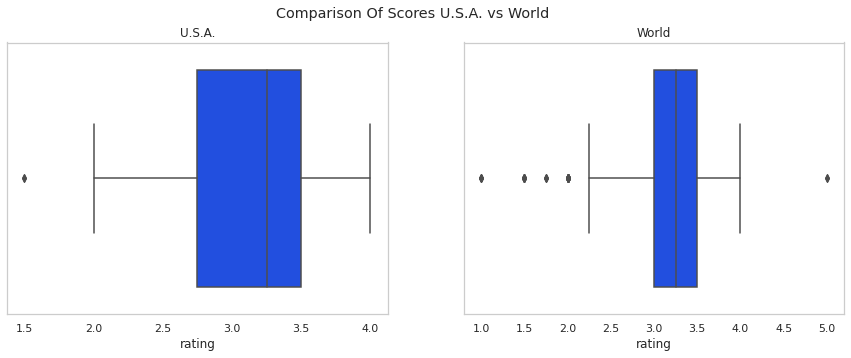

In [34]:
fig, axes = plt.subplots(1,2, figsize = (15,5), sharey= True)
fig.suptitle('Comparison Of Scores U.S.A. vs World')

sns.boxplot(ax=axes[0], x= usa_company_df["rating"]).set_title("U.S.A.")
sns.boxplot(ax=axes[1], x= n_usa_company_df["rating"]).set_title("World")

Even though the World scores have a much tighter grouping of scores. The United States and the World both have a median score between 3 & 3.5. With the world having more outliers on both side. Showing that there is no major difference in the ratings.  

# Chocolate Bar Analysis Conclusion

Chocolate bars rate on subjectivity from the flavor, to the texture, an after melt taste. From this analysis we did learn a few things. First the Trinitario bean and a bar with a cocoa percentage of 70% can affect the rating of a chocolate bar. While learning these things we also learned things that had no affect. Such as the region of growing a bean, and if the company was in the United States.

### Use Cases
There are a few use cases which may use this data. Entrepreneurs looking to start the next great chocolate bar company. Retail stores looking to put great tasting bars on their shelfs. 